In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [2]:
teams_df = pd.read_csv('data/2025/womens_summer_u20_ne_teams.csv')
teams_df

,Club ID,Club
0,175396,NORTH MISSISSAUGA SC U20 WOMEN
1,175342,NORTH TORONTO U20 WOMEN
2,183437,PICKERING FC U20 WOMEN
3,183417,OAKVILLE SC U20 WOMEN
4,183438,SIMCOE COUNTY ROVERS FC U20 WOMEN
5,175419,AURORA FC U20 WOMEN
6,183421,WHITBY FC U20 WOMEN
7,175372,WOODBRIDGE STRIKERS U20 WOMEN


In [3]:
scores_df = pd.read_csv('data/2025/2025-06-29_womens_summer_u20_ne_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262614011,0,0,175419,183421
1,262614012,1,0,175396,183438
2,262614013,1,1,175372,183437
3,262614014,3,0,175342,183417
4,262614015,4,0,183417,183437
5,262614016,0,2,183421,175396
6,262614017,2,2,175372,175419
7,262614018,1,1,183438,175342
8,262614019,1,0,183421,183437
9,262614020,0,4,175419,175342


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           NORTH MISSISSAUGA SC U20 WOMEN  NORTH TORONTO U20 WOMEN  PICKERING FC U20 WOMEN  OAKVILLE SC U20 WOMEN  SIMCOE COUNTY ROVERS FC U20 WOMEN  AURORA FC U20 WOMEN  WHITBY FC U20 WOMEN  WOODBRIDGE STRIKERS U20 WOMEN
262614011                               0                        0                       0                      0                                  0                    1                   -1                              0
262614012                               1                        0                       0                      0                                 -1                    0                    0                              0
262614013                               0                        0                      -1                      0                                  0                    0                    0                              1
262614014                               0                        1                       0                     -

In [6]:
print(X_df.T.to_string())

                                   262614011  262614012  262614013  262614014  262614015  262614016  262614017  262614018  262614019  262614020  262614021  262614022  262614023  262614024  262614025  262614026  262614027  262614028  262614029  262614030  262614031  262614032  262614034  262614035  262614036  262614037  262614038  262614039  262614040  262614041  262614042  262614043  262614044  262614045  262614046  262614047  262614048  262614049
NORTH MISSISSAUGA SC U20 WOMEN             0          1          0          0          0          1          0          0          0          0         -1          0          0          0          1          0          0          0          0          1         -1          0          0          0          0         -1          0          0         -1          0          0          0          0          0         -1          0         -1          0
NORTH TORONTO U20 WOMEN                    0          0          0          1          0        

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                                   NORTH MISSISSAUGA SC U20 WOMEN  NORTH TORONTO U20 WOMEN  PICKERING FC U20 WOMEN  OAKVILLE SC U20 WOMEN  SIMCOE COUNTY ROVERS FC U20 WOMEN  AURORA FC U20 WOMEN  WHITBY FC U20 WOMEN  WOODBRIDGE STRIKERS U20 WOMEN
NORTH MISSISSAUGA SC U20 WOMEN                                 10                       -1                      -1                     -1                                 -1                   -2                   -2                             -2
NORTH TORONTO U20 WOMEN                                        -1                       10                      -1                     -1                                 -2                   -2                   -2                             -1
PICKERING FC U20 WOMEN                                         -1                       -1                       8                     -2                                 -1                    0                   -2                             -1
OAKVILLE SC U20 

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                                   NORTH MISSISSAUGA SC U20 WOMEN  NORTH TORONTO U20 WOMEN  PICKERING FC U20 WOMEN  OAKVILLE SC U20 WOMEN  SIMCOE COUNTY ROVERS FC U20 WOMEN  AURORA FC U20 WOMEN  WHITBY FC U20 WOMEN  WOODBRIDGE STRIKERS U20 WOMEN
NORTH MISSISSAUGA SC U20 WOMEN                                 10                       -1                      -1                     -1                                 -1                   -2                   -2                             -2
NORTH TORONTO U20 WOMEN                                        -1                       10                      -1                     -1                                 -2                   -2                   -2                             -1
PICKERING FC U20 WOMEN                                         -1                       -1                       8                     -2                                 -1                    0                   -2                             -1
OAKVILLE SC U20 

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                                   GD
NORTH MISSISSAUGA SC U20 WOMEN     -6
NORTH TORONTO U20 WOMEN            26
PICKERING FC U20 WOMEN            -15
OAKVILLE SC U20 WOMEN              11
SIMCOE COUNTY ROVERS FC U20 WOMEN -14
AURORA FC U20 WOMEN                -8
WHITBY FC U20 WOMEN               -13
WOODBRIDGE STRIKERS U20 WOMEN       0


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                                   GD with limited blowouts
NORTH MISSISSAUGA SC U20 WOMEN                           -6
NORTH TORONTO U20 WOMEN                                  22
PICKERING FC U20 WOMEN                                  -14
OAKVILLE SC U20 WOMEN                                     9
SIMCOE COUNTY ROVERS FC U20 WOMEN                       -10
AURORA FC U20 WOMEN                                      -6
WHITBY FC U20 WOMEN                                      -9
WOODBRIDGE STRIKERS U20 WOMEN                             0


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                                   massey_rating
NORTH TORONTO U20 WOMEN                 2.128814
WOODBRIDGE STRIKERS U20 WOMEN           1.734944
OAKVILLE SC U20 WOMEN                   0.906722
AURORA FC U20 WOMEN                    -0.299457
NORTH MISSISSAUGA SC U20 WOMEN         -0.522878
SIMCOE COUNTY ROVERS FC U20 WOMEN      -1.096446
WHITBY FC U20 WOMEN                    -1.187147
PICKERING FC U20 WOMEN                 -1.664552


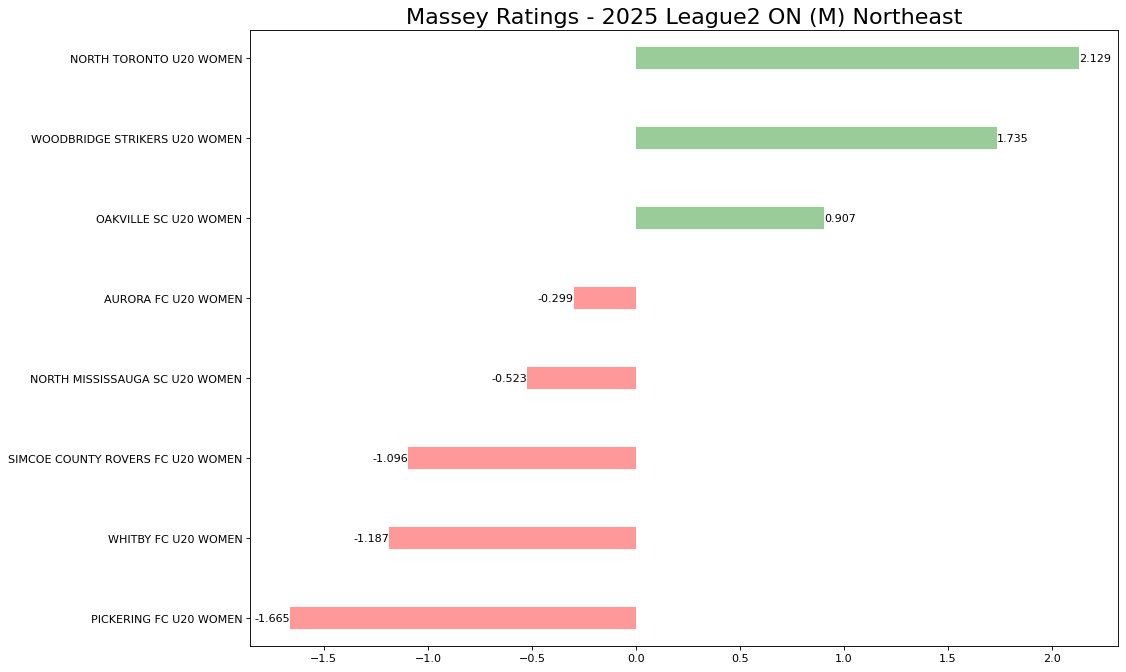

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                                   massey_rating
NORTH TORONTO U20 WOMEN                 1.839192
WOODBRIDGE STRIKERS U20 WOMEN           1.274248
OAKVILLE SC U20 WOMEN                   0.725752
AURORA FC U20 WOMEN                    -0.186192
NORTH MISSISSAUGA SC U20 WOMEN         -0.522831
SIMCOE COUNTY ROVERS FC U20 WOMEN      -0.743506
WHITBY FC U20 WOMEN                    -0.839192
PICKERING FC U20 WOMEN                 -1.547472


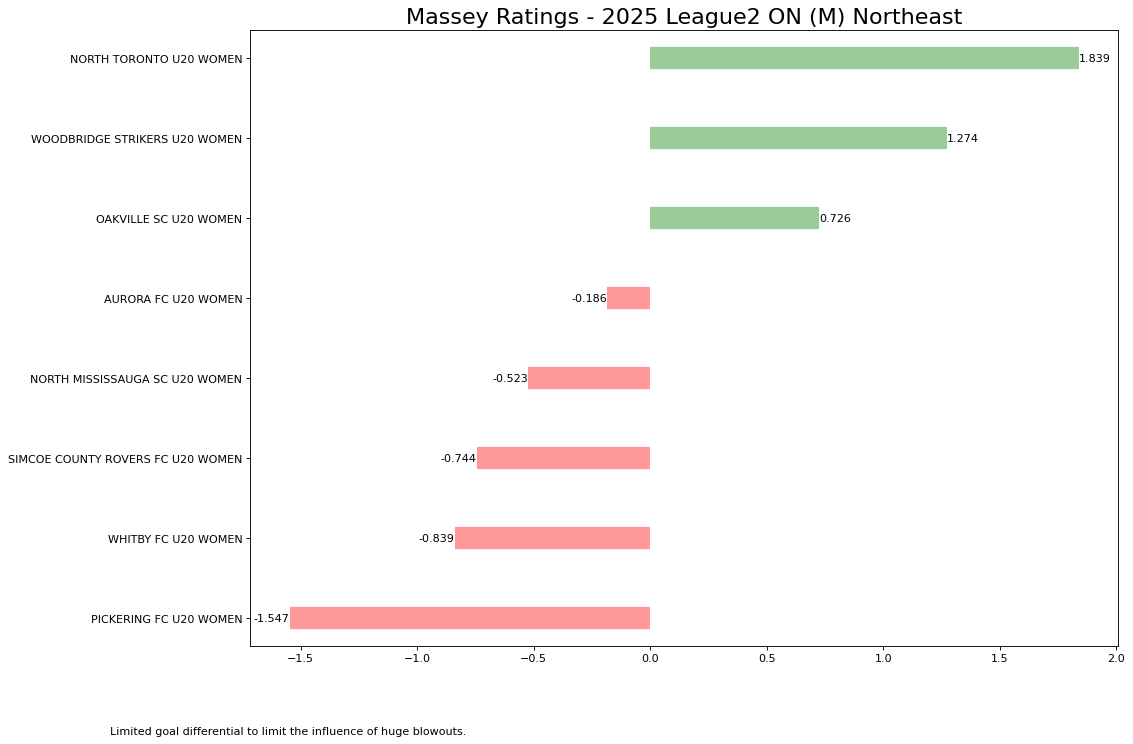

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()